In [1]:
import src.tools
from src.main import *

In [2]:
massmodels = import_massmodel_data(filepath='./sparc/MassModels_Lelli2016c.mrt')
mm_dict = {mm['ID']: massmodels[massmodels['ID'] == mm['ID']] for mm in massmodels}
metadata, refs = import_galaxy_sample_data(filepath='./sparc/SPARC_Lelli2016c.mrt')

In [3]:
gal_id = 'UGCA442'

In [4]:
print(mm_dict[gal_id])
print(metadata[gal_id])
print(refs[metadata[gal_id]['Ref']])

[('UGCA442', 4.35, 0.42, 14.2, 1.91,  4.87,  4.78, 0., 11.05, 0.)
 ('UGCA442', 4.35, 1.26, 28.6, 1.82, 13.14, 10.76, 0.,  5.81, 0.)
 ('UGCA442', 4.35, 2.11, 41. , 1.74, 19.65, 13.6 , 0.,  2.75, 0.)
 ('UGCA442', 4.35, 2.96, 49. , 1.91, 22.42, 13.29, 0.,  1.  , 0.)
 ('UGCA442', 4.35, 3.79, 54.8, 2.05, 22.82, 12.56, 0.,  0.72, 0.)
 ('UGCA442', 4.35, 4.65, 56.4, 3.12, 21.37, 12.33, 0.,  0.43, 0.)
 ('UGCA442', 4.35, 5.48, 57.8, 2.83, 18.73, 12.04, 0.,  0.18, 0.)
 ('UGCA442', 4.35, 6.33, 56.5, 0.65, 16.75, 10.62, 0.,  0.  , 0.)]
('UGCA442', 9, 4.35, 0.22, 2, 64., 7., 0.14, 0.005, 1.71, 7.6, 1.18, 116.1, 0.263, 4.37, 56.4, 2.1, 1, 'Co00')
Cote, S. et al. 2000, AJ, 120, 3027


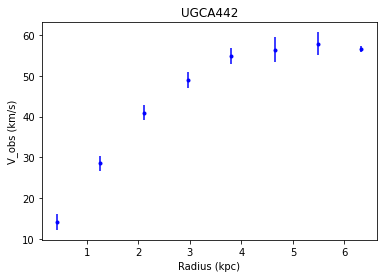

In [5]:
plot_single_galaxy(massmodels,gal_id)